# References

Section Data Exploration:

https://www.kaggle.com/andredornas/tp2-walmart-sales-forecast/notebook#Data-manipulation
https://www.kaggle.com/nsawal/walmart-baseline-sales-forecasting-lstm


# Import Packages

In [177]:
from scipy.signal import periodogram
from statsmodels.tsa.stattools import acf, pacf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import itertools
sns.set(style="ticks")
%config IPCompleter.greedy = True

# Import Data

In [2]:
home_dir = os.getcwd()
data_dir = home_dir + '\data\input'
data_preprocessed_dir = home_dir + '\data\preprocessed'
print(home_dir)
print(data_dir)
print(data_preprocessed_dir)

C:\dev\predicting-sales-data\m5_challenge
C:\dev\predicting-sales-data\m5_challenge\data\input
C:\dev\predicting-sales-data\m5_challenge\data\preprocessed


In [3]:
df_calendar = pd.read_csv(data_dir + '/calendar.csv')
df_sales = pd.read_csv(data_dir + '/sales_train_validation.csv')
df_prices = pd.read_csv(data_dir + '/sell_prices.csv')

# Data Exploration

## Calendar

In [4]:
df_calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [5]:
print("Structure of Store:\n", df_calendar.shape, '\n')
print("Number of missing values:\n",
      df_calendar.isnull().sum().sort_values(ascending=False), "\n")

Structure of Store:
 (1969, 14) 

Number of missing values:
 event_type_2    1964
event_name_2    1964
event_type_1    1807
event_name_1    1807
snap_WI            0
snap_TX            0
snap_CA            0
d                  0
year               0
month              0
wday               0
weekday            0
wm_yr_wk           0
date               0
dtype: int64 



## Sales

In [6]:
df_sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [7]:
print("Structure of Store:\n", df_sales.shape, '\n')
print("Number of missing values:\n",
      df_sales.isnull().sum().sort_values(ascending=False), "\n")

Structure of Store:
 (30490, 1919) 

Number of missing values:
 d_1913    0
d_638     0
d_626     0
d_627     0
d_628     0
         ..
d_1278    0
d_1279    0
d_1280    0
d_1281    0
id        0
Length: 1919, dtype: int64 



$\color{red}{\text{Finding:}}$  
- There are no missing values in the sales data. 

$\color{red}{\text{Question:}}$  
- Were all products in the product line during the entire time span? 


## Prices

In [8]:
df_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [9]:
df_prices['sell_price'].describe()

count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64

In [10]:
print("Structure of Store:\n", df_prices.shape, '\n')
print("Number of missing values:\n",
      df_prices.isnull().sum().sort_values(ascending=False), "\n")

Structure of Store:
 (6841121, 4) 

Number of missing values:
 sell_price    0
wm_yr_wk      0
item_id       0
store_id      0
dtype: int64 



# Transfrom Data Sets

In [11]:
def transform_dataframe(df_sales, df_calendar, df_prices, save_to_path=None):
    df = df_sales.melt(
        id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
        var_name='d',
        value_name='sale')
    df = df.merge(df_calendar, how='left')
    df = df.merge(df_prices, how='left')

    if save_to_path is not None:
        df.to_csv(save_to_path, index=False)

    return df

In [12]:
# Test of function transform_dataframe
transform_dataframe(df_sales.head(10), df_calendar, df_prices)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,0.96
19126,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1913,1,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,7.88
19127,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1913,1,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,0.48
19128,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,1.77


In [13]:
# Transform entire data set
# -> takes few minutes
# -> csv file is 8 GB large

# transform_dataframe(df_sales, df_calendar, df_prices,data_preprocessed_dir + '/input_data_complete_merged.csv')

# Plot Time Series of an item on different Levels

In [286]:
n_series = 4

## Unit sales of product x, aggregated for each store

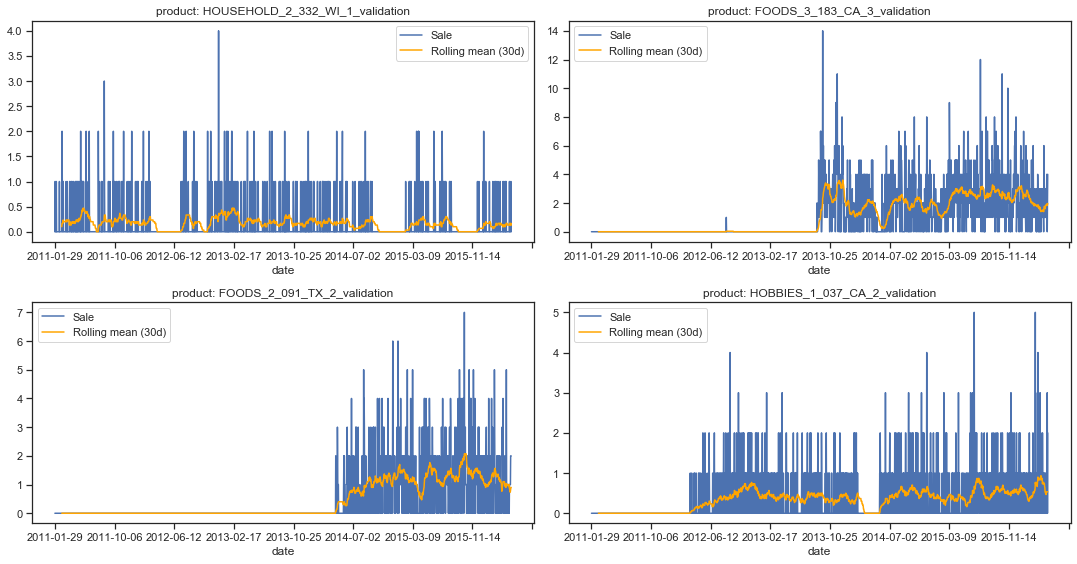

In [287]:
# Sample n random occurences
items = df_sales['id'].sample(n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for item in items:
    df = df_sales.loc[df_sales['id'] == str(item)]
    df = transform_dataframe(df, df_calendar, df_prices)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Product: {item}',
                 ax=axs[ax_idx])
    roll_mean = df[['sale']].rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

FINDING:  
not suitable to predict on this level


## Unit sales of product x, aggregated to a state

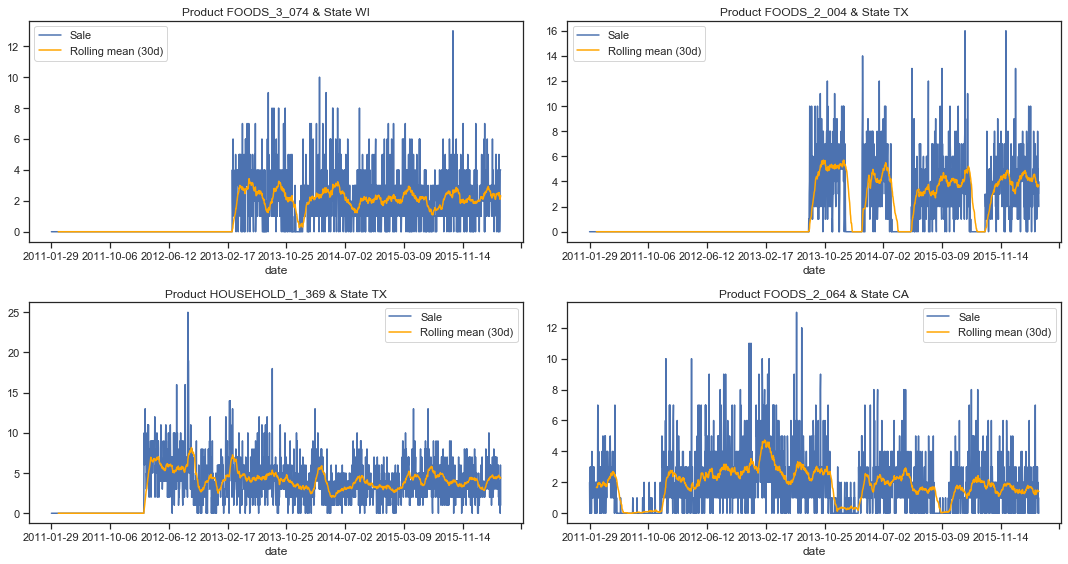

In [288]:
# Sample n random occurences
items = df_sales['item_id'].drop_duplicates()
states = df_sales['state_id'].drop_duplicates()
combinations = pd.Series(itertools.product(items, states)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for item, state in combinations:
    df = df_sales.loc[df_sales['item_id'] == str(item)].loc[
        df_sales['state_id'] == str(state)]

    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Product {item} & State {state}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

FINDING:  
not suitable to predict on this level

## Unit sales of product x, aggregated to all states and stores

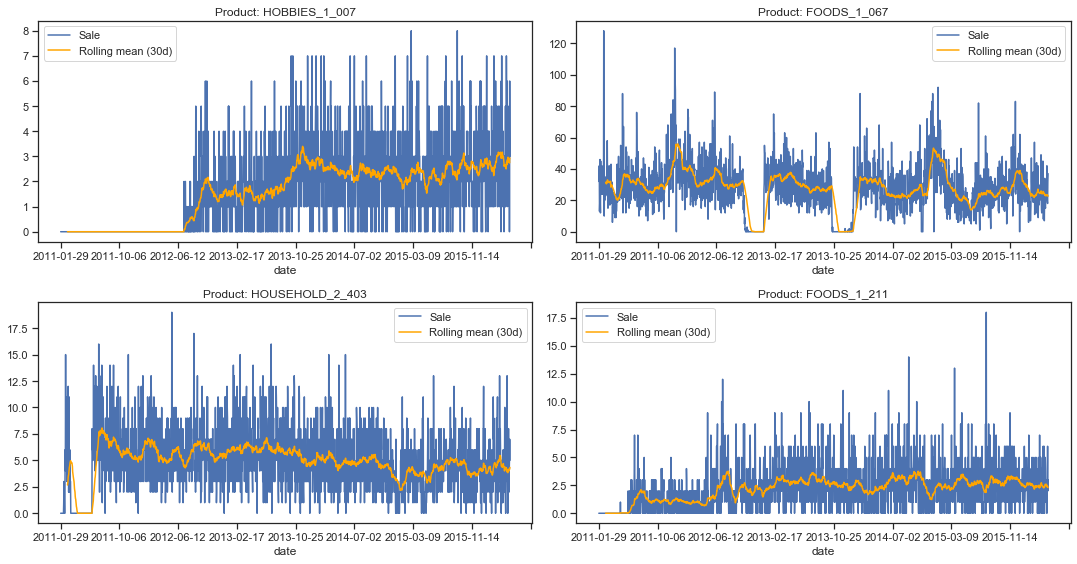

In [289]:
# Sample n random occurences
items = df_sales['item_id'].drop_duplicates().sample(n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for item in items:
    df = df_sales.loc[df_sales['item_id'] == str(item)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Product: {item}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

FINDING:  
not suitable to predict on this level

# Plot Time Series of all items on different Levels

## Unit sales of all products, aggregated for each store and department

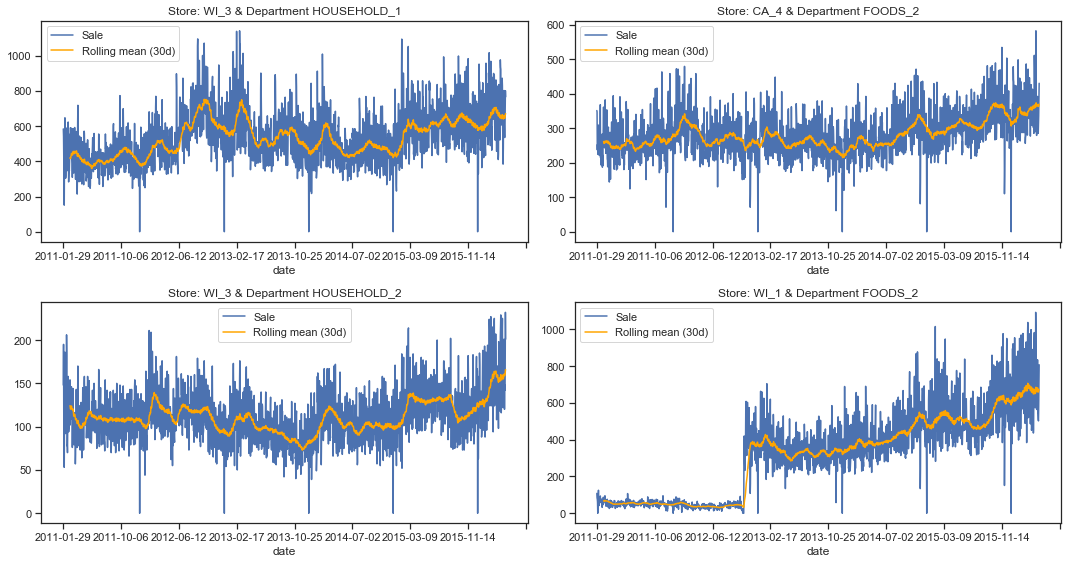

In [290]:
# Sample n random occurences
stores = df_sales['store_id'].drop_duplicates()
departments = df_sales['dept_id'].drop_duplicates()
combinations = pd.Series(itertools.product(stores, departments)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for store, dept in combinations:
    df = df_sales.loc[df_sales['store_id'] == str(store)].loc[
        df_sales['dept_id'] == str(dept)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Store: {store} & Department {dept}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each store and category

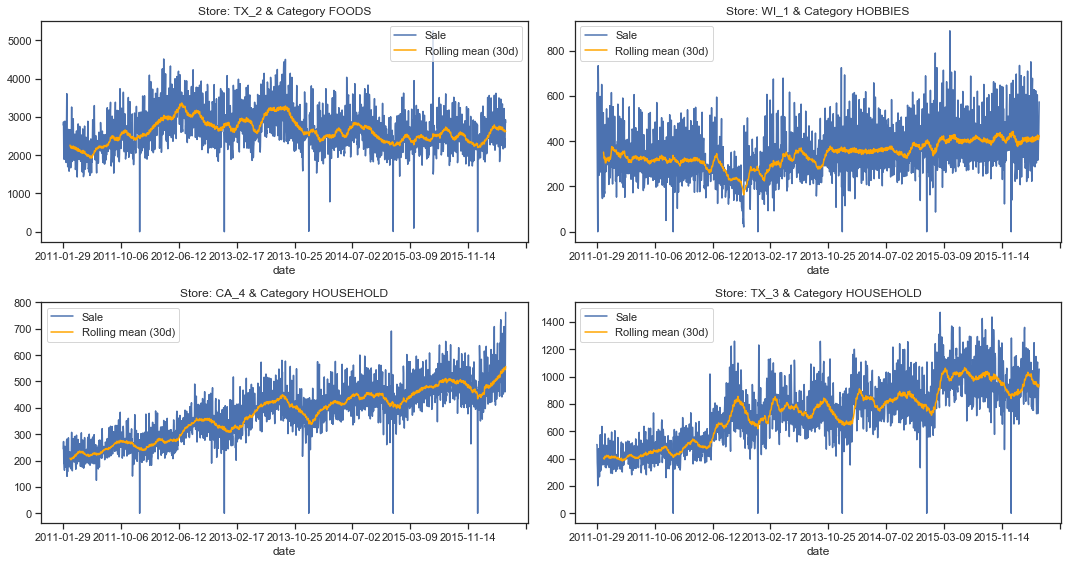

In [292]:
# Sample n random occurences
stores = df_sales['store_id'].drop_duplicates()
categories = df_sales['cat_id'].drop_duplicates()
combinations = pd.Series(itertools.product(stores, categories)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for store, cat in combinations:
    df = df_sales.loc[df_sales['store_id'] == str(store)].loc[
        df_sales['cat_id'] == str(cat)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Store: {store} & Category: {cat}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each State and department

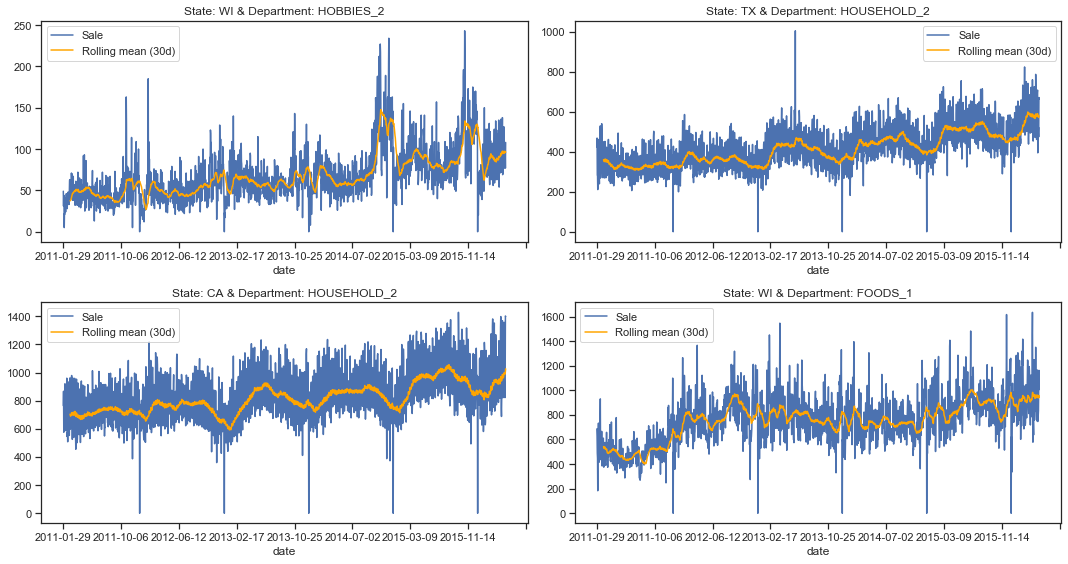

In [295]:
# Sample n random occurences
states = df_sales['state_id'].drop_duplicates()
departments = df_sales['dept_id'].drop_duplicates()
combinations = pd.Series(itertools.product(states, departments)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for state, dept in combinations:
    df = df_sales.loc[df_sales['state_id'] == str(state)].loc[
        df_sales['dept_id'] == str(dept)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'State: {state} & Department: {dept}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each State and category

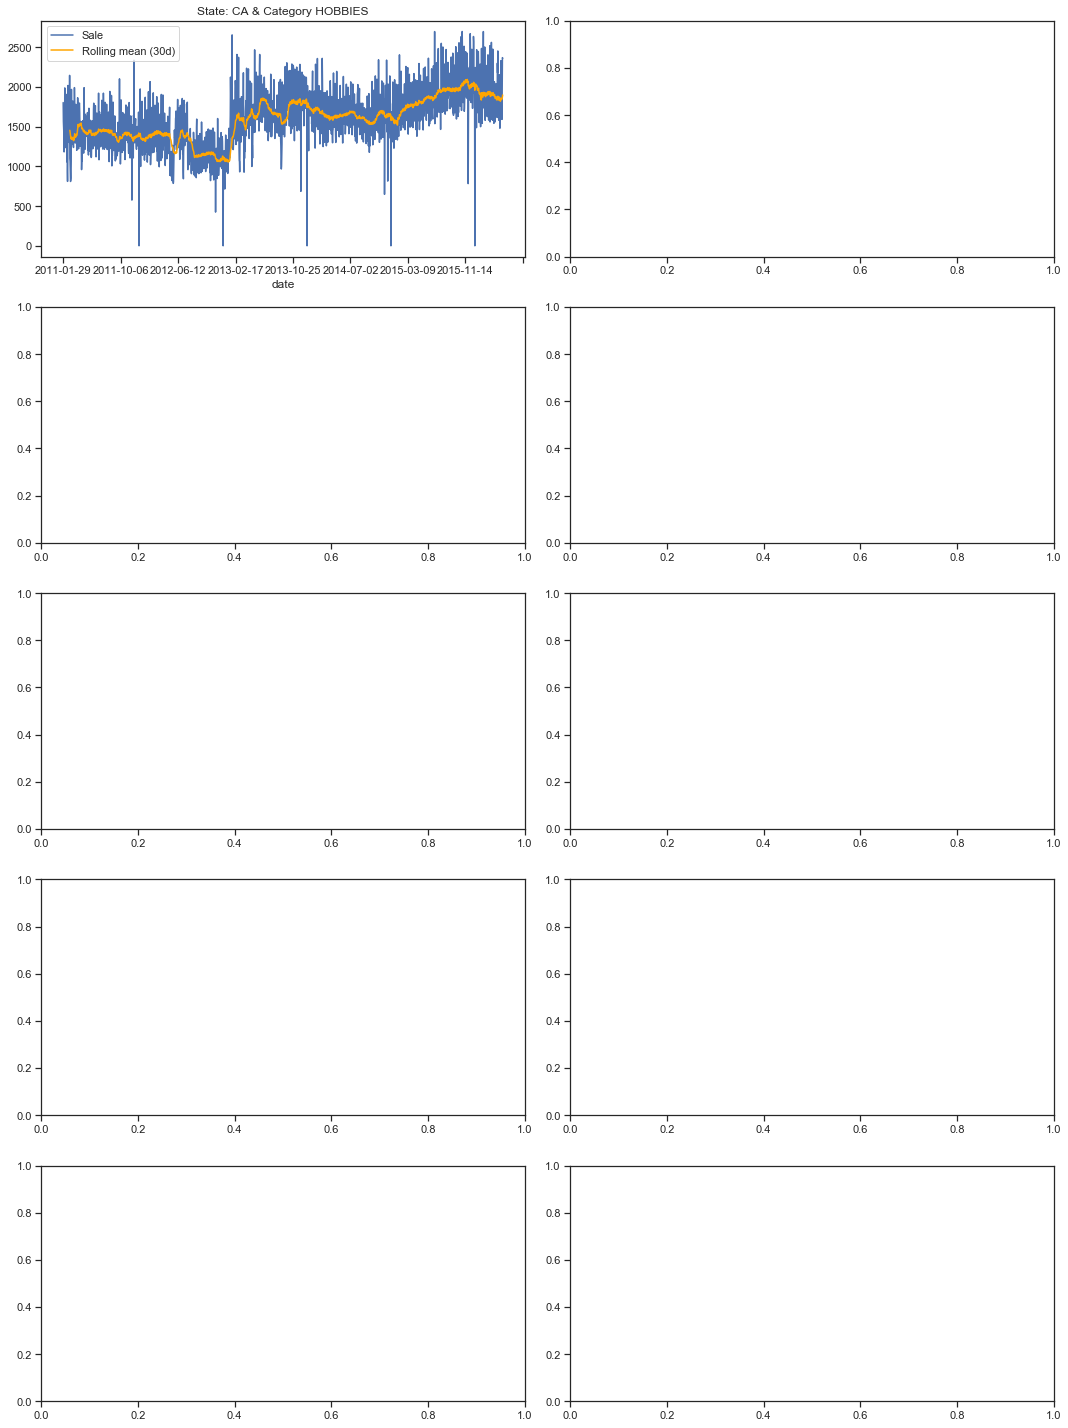

In [205]:
states = df_sales['state_id'].drop_duplicates()
categories = df_sales['cat_id'].drop_duplicates()
combinations = list(itertools.product(states, categories))

# Plot time series
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for state, category in combinations:
    df = df_sales.loc[df_sales['state_id'] == str(state)].loc[
        df_sales['cat_id'] == str(category)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'State: {state} & Category: {category}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each department

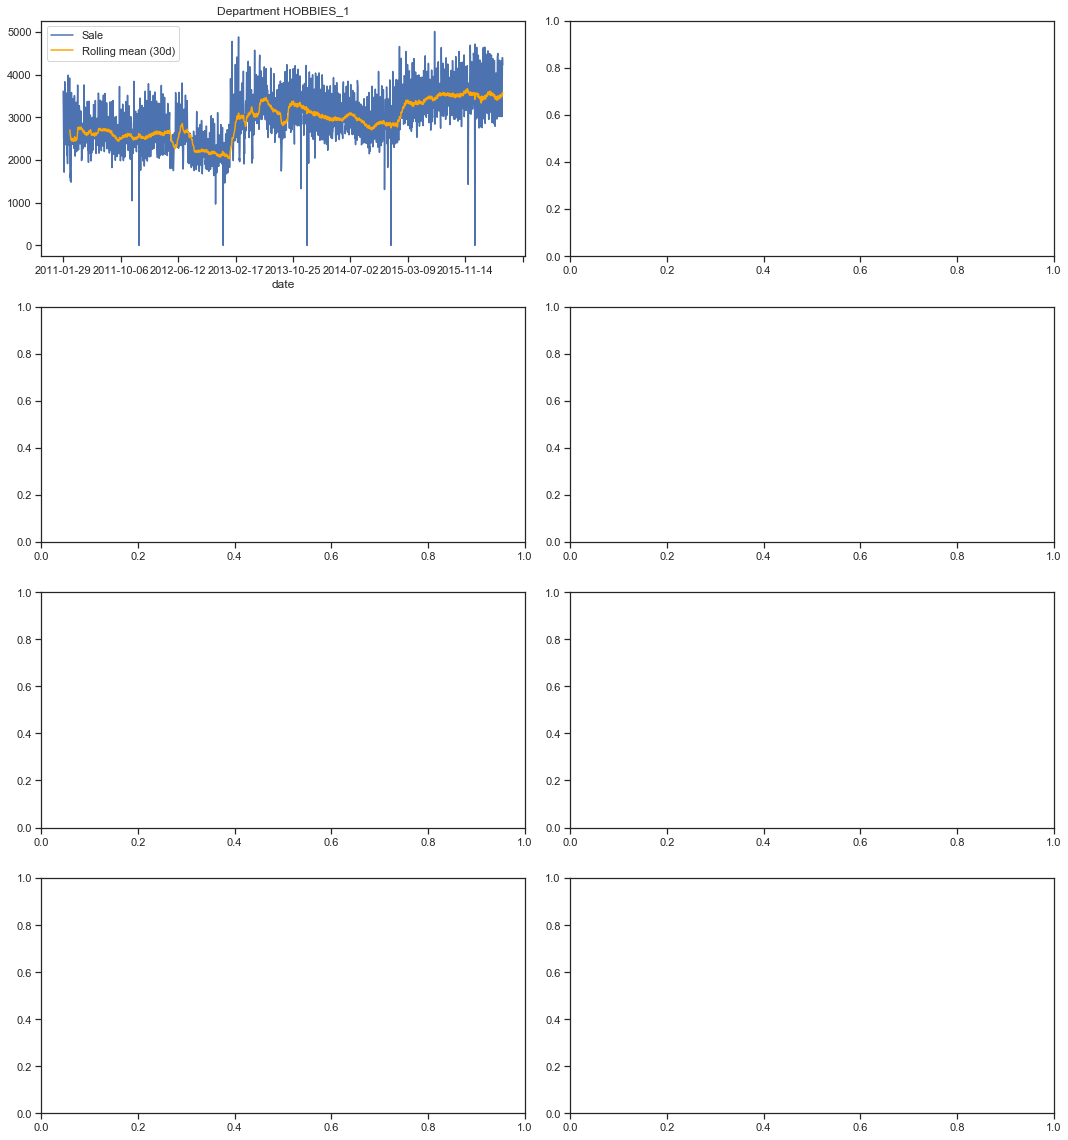

In [214]:
departments = df_sales['dept_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(4, 2, figsize=(15, 16))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for dept in departments:
    df = df_sales.loc[df_sales['dept_id'] == str(dept)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Department: {dept}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each category 

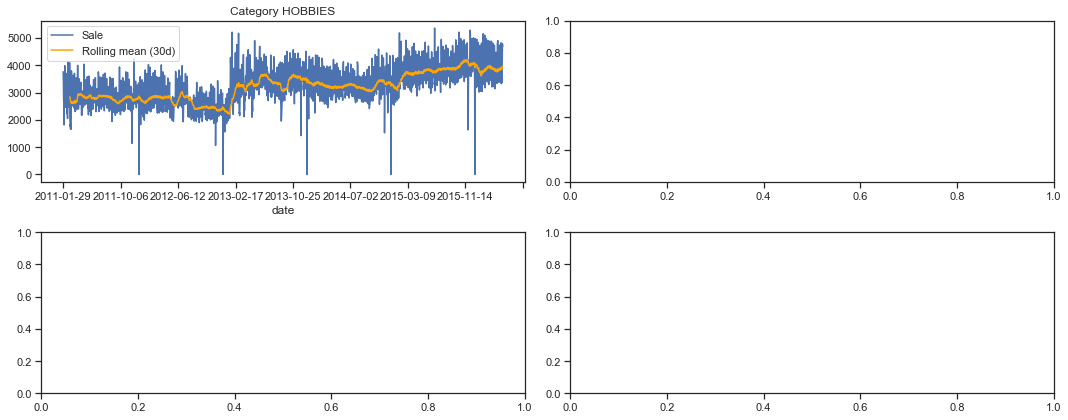

In [219]:
categories = df_sales['cat_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for category in categories:
    df = df_sales.loc[df_sales['cat_id'] == str(category)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Category: {category}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each store

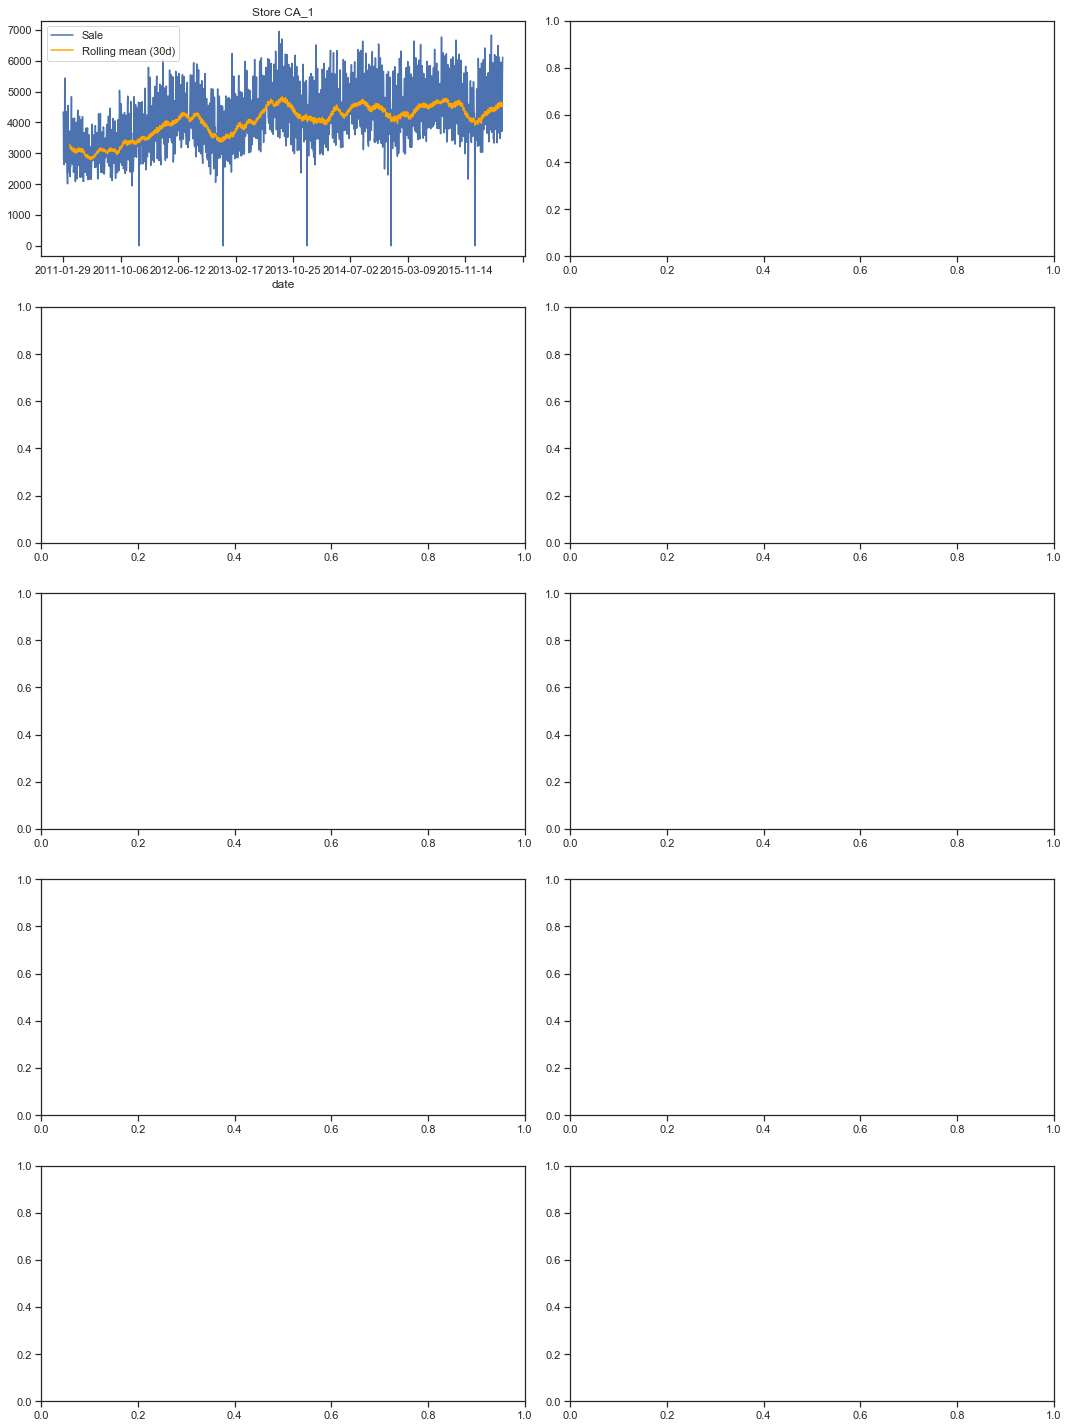

In [221]:
stores = df_sales['store_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for store in stores:
    df = df_sales.loc[df_sales['store_id'] == str(store)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Store: {store}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each State

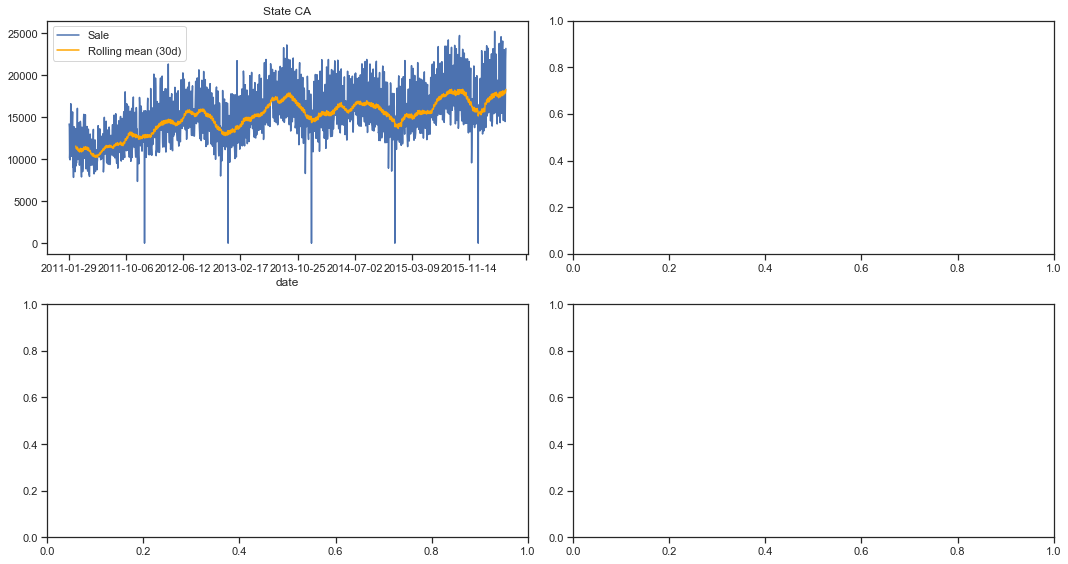

In [226]:
states = df_sales['state_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for state in states:
    df = df_sales.loc[df_sales['state_id'] == str(state)]
    df = transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'State: {state}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for all stores/states

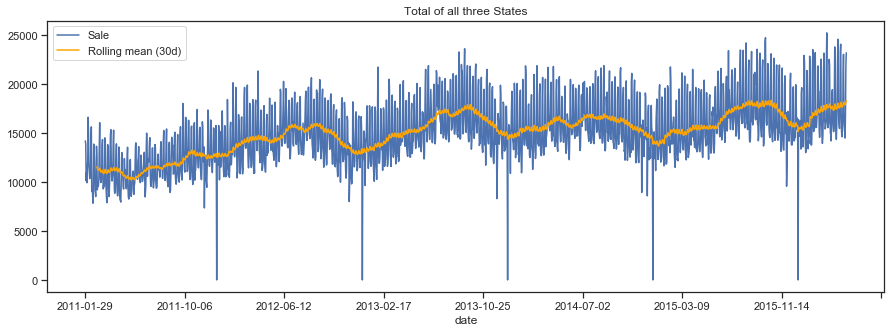

In [233]:
df = df_sales
df = transform_dataframe(df, df_calendar, df_prices)
df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
df.reset_index(level=df.index.names, inplace=True)
ax = df.plot(x='date',
             y='sale',
             style='-',
             title='Total of all three States',
             figsize=(15, 5))
roll_mean = df.rolling(30).mean()
roll_mean.plot(ax=ax, color='orange', legend=False)
ax.legend(['Sale', 'Rolling mean (30d)'])